In [2]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.DataFrame({
    'Flavor': ['Chocolate', 'Vanilla', 'Mint', 'Swirl', 'Nut'],
    'Orders': [1500, 670, 950, 450, 75]
})

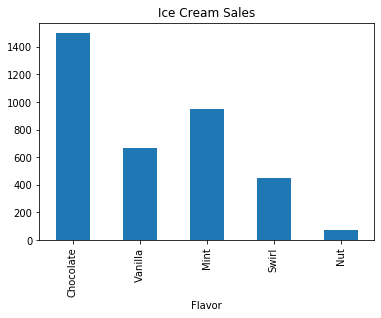

In [5]:
df.plot(kind='bar', x='Flavor', y='Orders', legend=None, title='Ice Cream Sales')
plt.show()

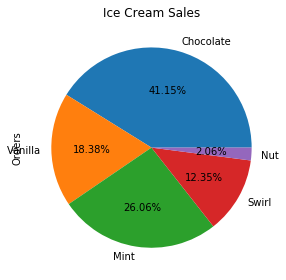

In [7]:
df.plot(kind='pie', labels=df['Flavor'], y='Orders', legend=None, autopct='%.2f%%', title='Ice Cream Sales')
plt.tight_layout()
plt.show()

In [8]:
def pareto_plot(df, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = df.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots()
    ax1.bar(x, y)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, '-ro', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), fontweight='heavy')    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.show()

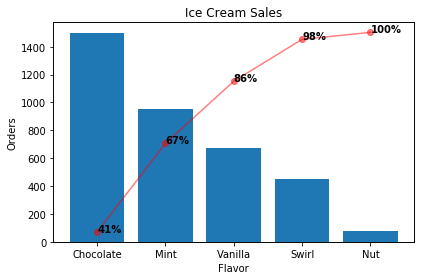

In [9]:
pareto_plot(df, x='Flavor', y='Orders', title='Ice Cream Sales')